# Exploratory Data Analysis: Covid Vaccine Tweet (CVT) Dataset

The tweets have #CovidVaccine hashtag. The collection started on 1/8/2020 and was downloaded from [Kaggle](https://www.kaggle.com/kaushiksuresh147/covidvaccine-tweets) on March 14, 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
import sys
import os

In [2]:
data_root = '../data/cvt/'
df = pd.read_csv(os.path.join(data_root, 'raw_covidvaccine.csv'))
df

/home/andrewchen/anaconda3/envs/ml_proj/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161246,Multivalent Dirk Haussecker,RNA World,Biotech stock addict. Trained in RNAi. Love gr...,2011-11-10 12:00:58,11708.0,371,9176,False,2021-03-11 22:30:23,$ABUS totally missing in action. Nothing on mR...,"['covidvaccine', 'sarscov2']",Twitter Web App,False
161247,Craig Brown 🏳️‍🌈,"Melbourne, Victoria",writer. dad. husband. exvangelical. type 1. le...,2012-06-20 16:47:27,397.0,838,9927,False,2021-03-11 22:30:05,"“It’s not a race,” says man already vaccinated...","['vaccine', 'auspol', 'CovidVaccine', 'ScottyF...",Twitter for iPhone,False
161248,Faith in New York,"New York, USA",Building power in New York faith institutions ...,2013-06-04 21:34:33,3122.0,2569,6663,False,2021-03-11 22:29:58,⚠️PSA FOR COVID-19 VACCINE⚠️\n\nIf you live in...,"['Bronx', 'Harlem']",Twitter for iPhone,False
161249,Openly Black & Queer & Adrian 🎵🎬⚖️,In My Bag,CashApp $inga4hire 💰 // #MeToo Fellow //Spelma...,2009-09-16 15:33:00,460.0,523,30867,False,2021-03-11 22:29:56,My doctor: Like to schedule your #CovidVaccine...,['CovidVaccine'],Twitter for Android,False


In [3]:
temp = df[['user_name', 'date', 'text', 'hashtags']]

In [4]:
dfi.export(temp, '../img/raw_covidvaccine.png', max_rows=10)

Check the number of `NaN` value in each column.

In [5]:
df.isnull().sum(axis = 0)

user_name               4
user_location       32831
user_description     9142
user_created            4
user_followers          5
user_friends            5
user_favourites         5
user_verified           5
date                    6
text                    5
hashtags            51520
source                153
is_retweet             10
dtype: int64

Check the date type for each column.

In [6]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

Check the values of `'user_verified'` and `'is_retweet'`.

In [7]:
df['user_verified'].value_counts()

False                                                                                                                                               119229
False                                                                                                                                                26902
True                                                                                                                                                 11834
True                                                                                                                                                  3277
@GovMikeDeWine just wondering if there's a chance we could speed up the whole vaccination process for those who wan… https://t.co/CoPORlDFDp             1
Thanks to the incredible team at @CNTWNHS for a friendly, safe, quick (and painless!) 1st #CovidVaccine today. \n\nIt… https://t.co/HoDBYai3Gk           1
Me on the 31st 🙋‍♂️😂\n#southafricancoronavirus #CovidVaccine #lockdown

In [8]:
df['is_retweet'].value_counts()

False    161241
Name: is_retweet, dtype: int64

Convert the columns to correct data types and drop useless column (`'is_retweet'`).

In [9]:
numeric_cols = ['user_followers', 'user_friends', 'user_favourites']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

d = {'True': True, 'False': False}
df['user_verified'] = df['user_verified'].replace(d)

df = df.drop(['is_retweet'], axis=1)

df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
161246,Multivalent Dirk Haussecker,RNA World,Biotech stock addict. Trained in RNAi. Love gr...,2011-11-10 12:00:58,11708.0,371.0,9176.0,False,2021-03-11 22:30:23,$ABUS totally missing in action. Nothing on mR...,"['covidvaccine', 'sarscov2']",Twitter Web App
161247,Craig Brown 🏳️‍🌈,"Melbourne, Victoria",writer. dad. husband. exvangelical. type 1. le...,2012-06-20 16:47:27,397.0,838.0,9927.0,False,2021-03-11 22:30:05,"“It’s not a race,” says man already vaccinated...","['vaccine', 'auspol', 'CovidVaccine', 'ScottyF...",Twitter for iPhone
161248,Faith in New York,"New York, USA",Building power in New York faith institutions ...,2013-06-04 21:34:33,3122.0,2569.0,6663.0,False,2021-03-11 22:29:58,⚠️PSA FOR COVID-19 VACCINE⚠️\n\nIf you live in...,"['Bronx', 'Harlem']",Twitter for iPhone
161249,Openly Black & Queer & Adrian 🎵🎬⚖️,In My Bag,CashApp $inga4hire 💰 // #MeToo Fellow //Spelma...,2009-09-16 15:33:00,460.0,523.0,30867.0,False,2021-03-11 22:29:56,My doctor: Like to schedule your #CovidVaccine...,['CovidVaccine'],Twitter for Android


In [10]:
# Convert format for 'user_created' column
series = df['user_created']

# Convert different formats of strings into datetime
one = pd.to_datetime(series, format='%d-%m-%Y %H:%M', errors='coerce')
two = pd.to_datetime(series, format='%d-%m-%Y %H:%M:S', errors='coerce')
three = pd.to_datetime(series, format='%Y-%m-%d %H:%M', errors='coerce')
four = pd.to_datetime(series, format='%Y-%m-%d %H:%M:S', errors='coerce')

# Fill the new column 
new_series = one.fillna(two).fillna(three).fillna(four)

# Check if any other 
print("Overlooked format and/or invalid values in the 'user_created' column: ")
print(series[new_series.isna()])

# Reassign the new_series to the column
df['user_created'] = new_series

Overlooked format and/or invalid values in the 'user_created' column: 
23986     False
27430       NaN
27431       932
45326       NaN
45327       378
64305       NaN
64306       747
110775      NaN
110776       75
Name: user_created, dtype: object


In [11]:
# Convert format for 'date' column
series = df['date']

# Convert different formats of strings into datetime
one = pd.to_datetime(series, format='%d-%m-%Y %H:%M', errors='coerce')
two = pd.to_datetime(series, format='%d-%m-%Y %H:%M:S', errors='coerce')
three = pd.to_datetime(series, format='%Y-%m-%d %H:%M', errors='coerce')
four = pd.to_datetime(series, format='%Y-%m-%d %H:%M:S', errors='coerce')

# Fill the new column 
new_series = one.fillna(two).fillna(three).fillna(four)

# Check if any other 
print("Overlooked format and/or invalid values in the 'date' column: ")
print(series[new_series.isna()])

# Reassign the new_series to the column
df['date'] = new_series

Overlooked format and/or invalid values in the 'date' column: 
23986                                                   NaN
27430                                                   NaN
27431     ['southafricancoronavirus', 'CovidVaccine', 'l...
45326                                                   NaN
45327                                                   NaN
64305                                                   NaN
64306                                      ['CovidVaccine']
110775                                                  NaN
110776    ['SickleCell', 'thalassaemia', 'COVID19', 'Cov...
Name: date, dtype: object


Drop rows with `NaN` in `['user_created, 'date']`.

In [12]:
df = df.dropna(subset=['user_created', 'date'])
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,2020-05-24 10:18:00,64.0,11.0,110.0,False,2020-08-18 12:55:00,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,2020-08-14 16:42:00,1.0,17.0,0.0,False,2020-08-18 12:55:00,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,2017-12-14 07:07:00,143.0,566.0,8.0,False,2020-08-18 12:46:00,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App
3,Zane,NaN,Fresher than you.,2019-09-18 11:01:00,29.0,25.0,620.0,False,2020-08-18 12:45:00,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
161246,Multivalent Dirk Haussecker,RNA World,Biotech stock addict. Trained in RNAi. Love gr...,2011-11-10 12:00:58,11708.0,371.0,9176.0,False,2021-03-11 22:30:23,$ABUS totally missing in action. Nothing on mR...,"['covidvaccine', 'sarscov2']",Twitter Web App
161247,Craig Brown 🏳️‍🌈,"Melbourne, Victoria",writer. dad. husband. exvangelical. type 1. le...,2012-06-20 16:47:27,397.0,838.0,9927.0,False,2021-03-11 22:30:05,"“It’s not a race,” says man already vaccinated...","['vaccine', 'auspol', 'CovidVaccine', 'ScottyF...",Twitter for iPhone
161248,Faith in New York,"New York, USA",Building power in New York faith institutions ...,2013-06-04 21:34:33,3122.0,2569.0,6663.0,False,2021-03-11 22:29:58,⚠️PSA FOR COVID-19 VACCINE⚠️\n\nIf you live in...,"['Bronx', 'Harlem']",Twitter for iPhone
161249,Openly Black & Queer & Adrian 🎵🎬⚖️,In My Bag,CashApp $inga4hire 💰 // #MeToo Fellow //Spelma...,2009-09-16 15:33:00,460.0,523.0,30867.0,False,2021-03-11 22:29:56,My doctor: Like to schedule your #CovidVaccine...,['CovidVaccine'],Twitter for Android


Dropping rows with `NaN` in `['user_created, 'date']` turns out to be dropping rows with `NaN` in `['user_followers', 'user_friends', 'user_favourites', user_verified', 'text, 'is_retweet]`.

In [13]:
df.isnull().sum(axis = 0)

user_name               4
user_location       32831
user_description     9142
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51515
source                144
dtype: int64

Invalid (neither True nor False) values in `'user_verified'` also turns out to be dropped.

In [14]:
df['user_verified'].value_counts()

False    146131
True      15111
Name: user_verified, dtype: int64

Convert data type of `'user_verified'` to `int`.

In [15]:
df['user_verified'] = df['user_verified'].astype(bool).astype(int)
df['user_verified'].value_counts()

<ipython-input-15-a0ab2475590e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_verified'] = df['user_verified'].astype(bool).astype(int)


0    146131
1     15111
Name: user_verified, dtype: int64

Keep only data up until 2021/02/28 23:59:59.

In [16]:
df = df[df['date'] < '2021-03-01 00:00:00']
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,2020-05-24 10:18:00,64.0,11.0,110.0,0,2020-08-18 12:55:00,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,2020-08-14 16:42:00,1.0,17.0,0.0,0,2020-08-18 12:55:00,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,2017-12-14 07:07:00,143.0,566.0,8.0,0,2020-08-18 12:46:00,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App
3,Zane,NaN,Fresher than you.,2019-09-18 11:01:00,29.0,25.0,620.0,0,2020-08-18 12:45:00,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,0,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
154542,Dawn B,NaN,NaN,2011-09-21 16:03:12,13.0,61.0,762.0,0,2021-02-26 00:03:57,Did you know you need an ID to get the COVID v...,"['COVID19', 'COVIDVaccine', 'COVIDVaccination']",Twitter for iPad
154543,crippled carrie bradshaw ♿️,Eric Foreman's Basement,what are you doing in my swamp? just a lil fi...,2011-03-10 13:12:31,448.0,344.0,3340.0,0,2021-02-26 00:01:12,I didn’t know I could be this excited to get a...,NaN,Twitter for iPhone
154544,vaccinesearch,NaN,Hit Me With Your Best Shot - Pat Benatar. Tale...,2021-02-18 06:03:14,83.0,39.0,81.0,0,2021-02-26 00:01:12,"ANDERSON, South Carolina\nBENNETTSVILLE \nBISH...",NaN,Twitter Web App
154545,Dolores Huerta Foundation,"Central Valley, CA",Organizes at the grassroots level by engaging ...,2014-03-27 20:36:48,4170.0,271.0,649.0,0,2021-02-26 00:00:48,#FRESNOCOUNTY: Find out if you're eligible for...,['FRESNOCOUNTY'],Hootsuite Inc.


Sort the data based on `['date']` in ascending order.

In [17]:
df = df.sort_values(by=['date']).reset_index(drop=True)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,Ashwin,India 🇮🇳,I'm Just A Man On a Mission For My Vision!\n\n...,2018-01-08 06:01:00,89.0,3108.0,6780.0,0,2020-08-09 19:15:00,Huge Thanks And Best Wishes With @SerumInstInd...,['COVISHEILD'],Twitter for Android
1,K. Kartik Rao,Mumbai and Nagpur India,Actor 🎭 \n\nhttps://t.co/u7GZfoWBDt\n\nSubscri...,2016-12-10 16:06:00,225.0,257.0,25362.0,0,2020-08-09 20:02:00,Any update of #CovidVaccine ????,['CovidVaccine'],Twitter for Android
2,Mac Patrick (Road Hater) Henry,German Bundesrepublik,Liberty lover. \nServing the people of the 🇺🇸....,2014-01-11 19:47:00,338.0,277.0,28305.0,0,2020-08-09 21:21:00,From a private frontline COVID nurses group to...,"['COVID19', 'CovidVaccineRace', 'CovidVaccine'...",Twitter Web App
3,lydia Bell,Earth,"Mummy, animal lover , energy worker , awake in...",2009-03-23 01:09:00,2038.0,1105.0,63422.0,0,2020-08-09 21:29:00,So you want the whole world to take a #covidva...,['covidvaccine'],Twitter for iPhone
4,Lou Ann Donovan,"Kansas, USA",Live Young Look Young BE Young! Certified Inte...,2009-03-17 05:42:00,4365.0,4581.0,2505.0,0,2020-08-09 22:55:00,Watch to learn about the Phase 3 clinical tria...,"['COVID19', 'CovidVaccine', 'CovidClinicalTrial']",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...
154533,Script Your Future '21,DMV,HowardU and Script Your Future has joined forc...,2021-01-31 18:40:41,15.0,42.0,4.0,0,2021-02-28 23:55:25,* Continue with routine preventive measures (s...,NaN,Twitter Web App
154534,eastvillagetwt,"East Village, New York, NY","Politics, the environment, science, culture, t...",2011-08-27 19:24:17,1968.0,5001.0,136110.0,0,2021-02-28 23:56:37,COVID: California Suspends System Of Shared Va...,"['COVID19', 'COVIDVaccine']",Twitter for iPhone
154535,Yogita,"New York, NY",Primum non nocere 💕👩🏽‍⚕️ | Tweets are my own. ...,2015-08-07 01:48:57,17.0,58.0,1194.0,0,2021-02-28 23:57:00,Today I got my first dose of the #COVIDVaccine...,['COVIDVaccine'],Twitter for Android
154536,DrZ,USA,NaN,2016-03-23 13:00:36,54.0,4.0,4.0,0,2021-02-28 23:57:06,Here's Where to Receive a COVID Vaccine in Ill...,"['Illinois', 'COVIDvaccine']",Buffer


Write the cleaned data to `covidvaccine.csv`. 

In [18]:
def clean_list(list_):
    if isinstance(list_, float):
        return list_
    list_ = list_.replace("', '", " ")
    list_ = list_.replace("['", "")
    list_ = list_.replace("']", "")
    list_ = list_.lower()
    return list_

def count_list(list_):
    if isinstance(list_, float):
        return 0
    return len(list_.split())

df['hashtags'] = df['hashtags'].apply(clean_list)
df['hashtag_count'] = df['hashtags'].apply(count_list)

df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,hashtag_count
0,Ashwin,India 🇮🇳,I'm Just A Man On a Mission For My Vision!\n\n...,2018-01-08 06:01:00,89.0,3108.0,6780.0,0,2020-08-09 19:15:00,Huge Thanks And Best Wishes With @SerumInstInd...,covisheild,Twitter for Android,1
1,K. Kartik Rao,Mumbai and Nagpur India,Actor 🎭 \n\nhttps://t.co/u7GZfoWBDt\n\nSubscri...,2016-12-10 16:06:00,225.0,257.0,25362.0,0,2020-08-09 20:02:00,Any update of #CovidVaccine ????,covidvaccine,Twitter for Android,1
2,Mac Patrick (Road Hater) Henry,German Bundesrepublik,Liberty lover. \nServing the people of the 🇺🇸....,2014-01-11 19:47:00,338.0,277.0,28305.0,0,2020-08-09 21:21:00,From a private frontline COVID nurses group to...,covid19 covidvaccinerace covidvaccine pandemic,Twitter Web App,4
3,lydia Bell,Earth,"Mummy, animal lover , energy worker , awake in...",2009-03-23 01:09:00,2038.0,1105.0,63422.0,0,2020-08-09 21:29:00,So you want the whole world to take a #covidva...,covidvaccine,Twitter for iPhone,1
4,Lou Ann Donovan,"Kansas, USA",Live Young Look Young BE Young! Certified Inte...,2009-03-17 05:42:00,4365.0,4581.0,2505.0,0,2020-08-09 22:55:00,Watch to learn about the Phase 3 clinical tria...,covid19 covidvaccine covidclinicaltrial,Twitter for iPhone,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154533,Script Your Future '21,DMV,HowardU and Script Your Future has joined forc...,2021-01-31 18:40:41,15.0,42.0,4.0,0,2021-02-28 23:55:25,* Continue with routine preventive measures (s...,NaN,Twitter Web App,0
154534,eastvillagetwt,"East Village, New York, NY","Politics, the environment, science, culture, t...",2011-08-27 19:24:17,1968.0,5001.0,136110.0,0,2021-02-28 23:56:37,COVID: California Suspends System Of Shared Va...,covid19 covidvaccine,Twitter for iPhone,2
154535,Yogita,"New York, NY",Primum non nocere 💕👩🏽‍⚕️ | Tweets are my own. ...,2015-08-07 01:48:57,17.0,58.0,1194.0,0,2021-02-28 23:57:00,Today I got my first dose of the #COVIDVaccine...,covidvaccine,Twitter for Android,1
154536,DrZ,USA,NaN,2016-03-23 13:00:36,54.0,4.0,4.0,0,2021-02-28 23:57:06,Here's Where to Receive a COVID Vaccine in Ill...,illinois covidvaccine,Buffer,2


In [19]:
df.to_csv(os.path.join(data_root, 'covidvaccine.csv'), index=False)

In [20]:
temp = df[['user_name', 'date', 'text', 'hashtags']]

In [21]:
dfi.export(temp, '../img/covidvaccine.png', max_rows=10)

See how the tweets are distributed across time.

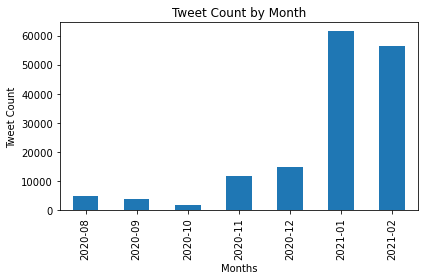

In [22]:
count_by_month = df['date'].groupby(df.date.dt.to_period("M")).agg('count')
ax = count_by_month.plot(kind='bar')
ax.set_xlabel("Months")
ax.set_ylabel("Tweet Count")
ax.set_title("Tweet Count by Month")
plt.tight_layout()
plt.savefig("../img/tweet_count_by_month.png", facecolor='w')

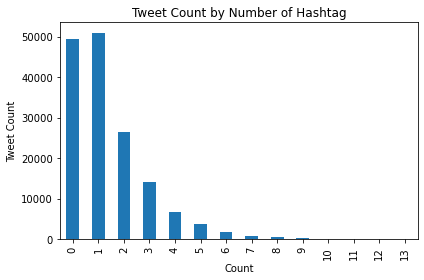

In [23]:
count_by_hashtag = df['hashtag_count'].value_counts().sort_index()
ax = count_by_hashtag.plot(kind='bar')
ax.set_xlabel("Count")
ax.set_ylabel("Tweet Count")
ax.set_title("Tweet Count by Number of Hashtag")
plt.tight_layout()
plt.savefig("../img/tweet_count_by_number_of_hashtag.png", facecolor='w')

In [24]:
df['source'].value_counts()

Twitter for iPhone       51517
Twitter Web App          49413
Twitter for Android      31827
Hootsuite Inc.            4986
Twitter for iPad          4513
                         ...  
Wildmoka                     1
Twheater_live                1
Amplifr                      1
ChimpReports_                1
Nintendo Switch Share        1
Name: source, Length: 238, dtype: int64